In [33]:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()

print("train")
print("x", x_train.shape)
print("y", y_train.shape)

print("test")
print("x", x_test.shape)
print("y", y_test.shape)



train
x (60000, 28, 28)
y (60000,)
test
x (10000, 28, 28)
y (10000,)


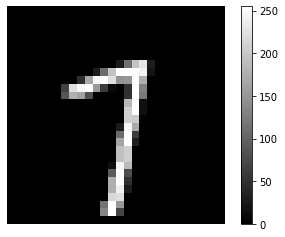

In [4]:
n= 42
plt.imshow(x_train[n,:,:], cmap="gray")
plt.axis(False)
plt.colorbar()

In [5]:
print(y_train[:10])


[5 0 4 1 9 2 1 3 1 4]


In [34]:

from tensorflow.keras.utils import to_categorical
y_train_c = to_categorical(y_train, 10)
y_test_c = to_categorical(y_test, 10)

In [32]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

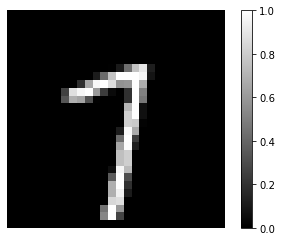

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

n= 42
plt.imshow(x_train[n,:,:], cmap="gray")
plt.axis(False)
plt.colorbar()

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense 

# model 
model_flat = Sequential()

# input
model_flat.add(Flatten(input_shape=(28,28)))

# hidden
model_flat.add(Dense(units=128, activation="relu"))

# output
model_flat.add(Dense(units=10, activation="softmax"))

# compile
model_flat.compile(optimizer="adam", 
                   loss="categorical_crossentropy", 
                   metrics=["accuracy"])

# history
hist = model_flat.fit(x_train, 
                      y_train_c, 
                      validation_data=(x_test, y_test_c), 
                      batch_size=128, 
                      epochs=20)

# prediction
y_pred = model_flat.predict(x_test)


Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 4.6253 - accuracy: 0.8679 - val_loss: 1.0808 - val_accuracy: 0.9000
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6634 - accuracy: 0.9085 - val_loss: 0.5186 - val_accuracy: 0.9064
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.3458 - accuracy: 0.9277 - val_loss: 0.4182 - val_accuracy: 0.9250
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2527 - accuracy: 0.9412 - val_loss: 0.4045 - val_accuracy: 0.9367
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.2061 - accuracy: 0.9495 - val_loss: 0.3588 - val_accuracy: 0.9378
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1722 - accuracy: 0.9550 - val_loss: 0.3716 - val_accuracy: 0.9321
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1643 - accuracy: 0.9566 - val_loss: 0.3194 - val_accuracy: 0.9460
Epoch 

In [17]:
28*28*128

100352

In [37]:
model_flat.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
print("prediction shape", y_pred.shape)

prediction shape (10000, 10)


In [38]:
from sklearn.metrics import classification_report
import numpy as np 
y_pred_class = np.argmax(y_pred, axis=-1)

print("classification report", classification_report(y_test, y_pred_class))


classification report               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.96      0.96      1032
           3       0.94      0.95      0.95      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.92      0.94       892
           6       0.97      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.94      0.96      0.95       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [11]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

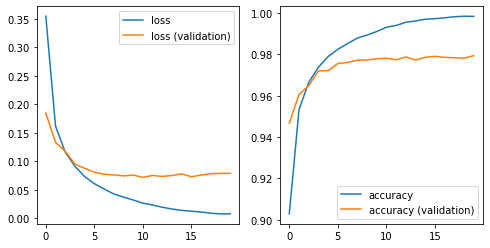

In [21]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='loss (validation)')
plt.legend()

plt.subplot(122)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='accuracy (validation)')
plt.legend()

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.4322 - accuracy: 0.8775 - val_loss: 0.1313 - val_accuracy: 0.9608
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1216 - accuracy: 0.9640 - val_loss: 0.0888 - val_accuracy: 0.9732
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0899 - accuracy: 0.9728 - val_loss: 0.0687 - val_accuracy: 0.9790
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0752 - accuracy: 0.9770 - val_loss: 0.0683 - val_accuracy: 0.9780
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0665 - accuracy: 0.9797 - val_loss: 0.0611 - val_accuracy: 0.9803
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0599 - accuracy: 0.9815 - val_loss: 0.0568 - val_accuracy: 0.9819
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0542 - accuracy: 0.9833 - val_loss: 0.0523 - val_accuracy: 0.9827
Epoch 

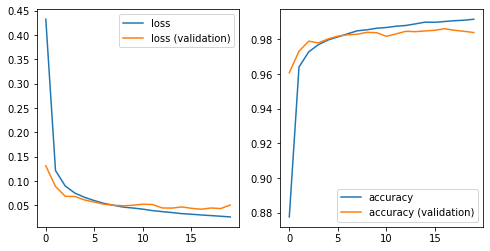

In [29]:
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D

# data 2 
x_train_tensor = np.expand_dims(x_train, -1)
x_test_tensor = np.expand_dims(x_test, -1)

# model
model_conv = Sequential()

# input 
model_conv.add( Input(shape=(28,28,1)) )

# hidden
model_conv.add( Conv2D(filters=16, kernel_size = (3,3), activation="relu") )
model_conv.add( MaxPooling2D(pool_size=(2, 2)) )

model_conv.add( Conv2D(filters=16,kernel_size = (3,3), activation="relu"))
model_conv.add( MaxPooling2D(pool_size=(2, 2)) )

# output
model_conv.add(Flatten())
model_conv.add(Dense(units=10, activation="softmax"))

# compile
model_conv.compile(optimizer="adam", 
                   loss="sparse_categorical_crossentropy", 
                   metrics=["accuracy"])

# history
hist_conv = model_conv.fit(x_train_tensor, 
                      y_train, 
                      validation_data=(x_test_tensor, y_test), 
                      batch_size=128, 
                      epochs=20)

# prediction
y_pred_conv = model_conv.predict(x_test_tensor)

y_pred_class_conv = np.argmax(y_pred_conv, axis=-1)

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.plot(hist_conv.history['loss'], label='loss')
plt.plot(hist_conv.history['val_loss'], label='loss (validation)')
plt.legend()

plt.subplot(122)
plt.plot(hist_conv.history['accuracy'], label='accuracy')
plt.plot(hist_conv.history['val_accuracy'], label='accuracy (validation)')
plt.legend()


In [30]:

print("classification report", classification_report(y_test, y_pred_class_conv))



classification report               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.96      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

